#  ПРИКЛАД ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ № 3. ПРОСТОРОВА ФІЛЬТРАЦІЯ
#  3. Виділення границь

In [51]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [52]:
## Завантаження файлу зображення
filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
## filename = 'd:/test_simpl_200__.jpg'
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (900, 900, 3) IMAGE SIZE 2430000
ROWS NUMBER 900 CLMS NUMBER 900 PIX NUMBER 810000 Bins 256


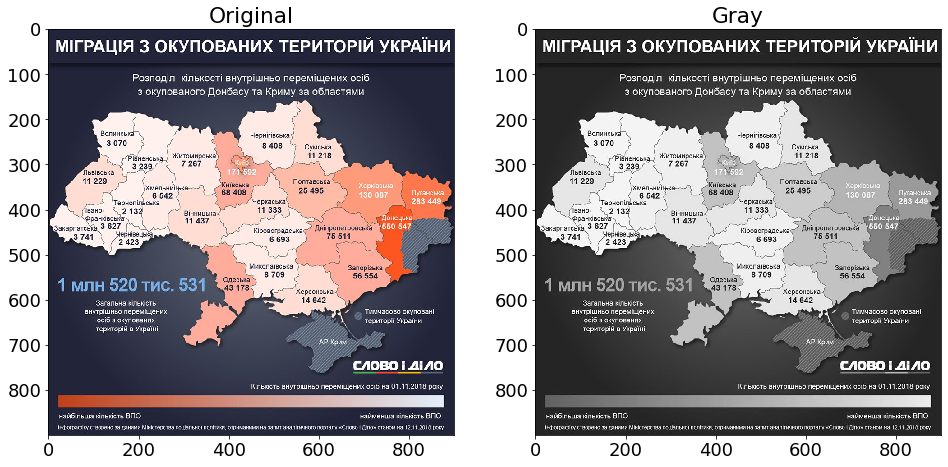

In [53]:
## Визначення масиву НАПІВТТОНОВОГО зображення
gray_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        gray_im [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]
        
## СУМІСНИЙ ВИВІД НАПІВТОНОВАНОГО та НЕГАТИВНОГО НАПІВТОНОВАНОГО зображення
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original")
ax[1].imshow(gray_im)
ax[1].set_title("Gray")
plt.show()

MASK SHAPE (3, 3) MASK SIZE 9
SOBEL  MASK X
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
SOBEL  MASK Y
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]
-954.0 -954.0 -954.0
741.0 741.0 741.0
0.0005899705014749262 0.0005899705014749262 0.0005899705014749262


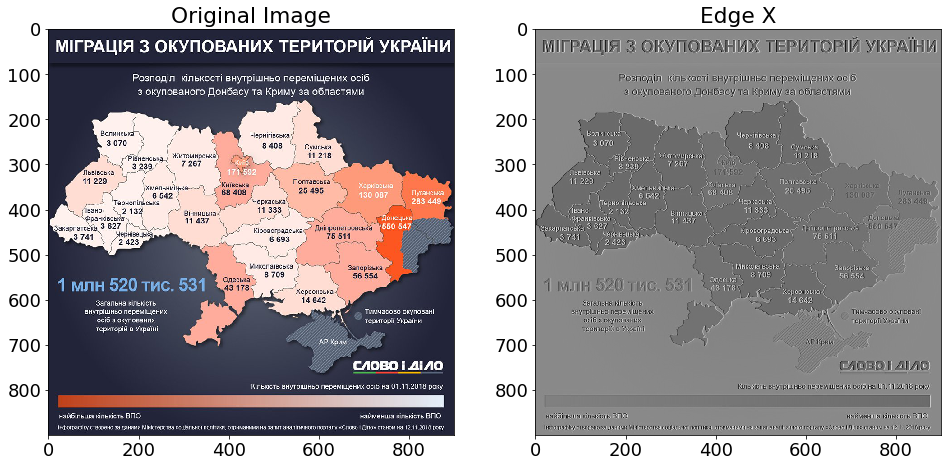

In [54]:
## Визначення маски фильтру підвищення різкості
mask_row = 3
mask_clm = 3
mask_edge_  = np.zeros ( (mask_row, mask_clm), dtype = np.float32)
mask_edge_x = np.zeros ( (mask_row, mask_clm), dtype = np.float32)
mask_edge_y = np.zeros ( (mask_row, mask_clm), dtype = np.float32)
print ('MASK SHAPE', mask_edge_x.shape, 'MASK SIZE', mask_row*mask_clm)

mask_edge_[0,0] = mask_edge_[2,0] = 0.0
mask_edge_[2,0] = mask_edge_[2,2] = 0.0
mask_edge_[1,0] = mask_edge_[1,2] = 1 
mask_edge_[0,1] = mask_edge_[2,1] = 1
mask_edge_[1,2] = -4   



mask_edge_x[0,0] = mask_edge_x[2,0] = -1 
mask_edge_x[1,0] = - 2 
mask_edge_x[0,2] = mask_edge_x[2,2] = 1
mask_edge_x[1,2] = 2  

print('SOBEL  MASK X')
print(mask_edge_x)

mask_edge_y[0,0] = mask_edge_y[0,2] = - 1 
mask_edge_y[0,1] = - 2 
mask_edge_y[2,0] = mask_edge_y[2,2] = 1 
mask_edge_y[2,1] = 2

print('SOBEL  MASK Y')
print(mask_edge_y)

## Визначення файлу перетворенного зображення
pixel = np.zeros(3, dtype=np.float32)
filtr_im_x      = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)
filtr_im_y      = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)
image_out       = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)  ###   0.0  <---> 1.0

#for i in  range (1, (rows_num-1), 1):
#    for j in  range (1, (clms_num -1), 1):
for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        pixel[:] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                pixel += mask_edge_[l,k]*np.float32(gray_im [i-(1-l), j-(1-k), : ])
                ## pixel += mask_edge_y[l,k]*np.float32(test_im [i-(1-k), j-(1-l), : ])
                ## print (i, j, l, k, test_im [i-(1-k), j-(1-l), : ], pixel)                        
        filtr_im_x [i, j, : ] = pixel [:]
        

'''        
for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num-1), 1):
        pixel[:] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                pixel += mask_edge_y[l,k]*filtr_im_ [i-(1-l), j-(1-k), : ]
                ## pixel += mask_edge_y[l,k]*np.float32(test_im [i-(1-k), j-(1-l), : ])
                ## print (i, j, l, k, test_im [i-(1-k), j-(1-l), : ], pixel)                        
        filtr_im_y [i, j, : ] = pixel [:]
''' 

## --  ДЛЯ НОЛМАЛІЗАЦІЇЇ ЯСКРАВОСТІ --
## 
min_R = np.min(filtr_im_x [:,:, 0])
min_G = np.min(filtr_im_x [:,:, 1])
min_B = np.min(filtr_im_x [:,:, 2])
print(min_R, min_G, min_B)
max_R = np.max(filtr_im_x [:,:, 0])
max_G = np.max(filtr_im_x[:,:, 1])
max_B = np.max(filtr_im_x [:,:, 2])
print(max_R, max_G, max_B)
Koef_R =  1.0/(max_R - min_R)
Koef_G =  1.0/(max_G - min_G)
Koef_B =  1.0/(max_B - min_B)
print(Koef_R, Koef_G, Koef_B)

for i in  range (1, (rows_num-1), 1):
    for j in  range (1, (clms_num -1), 1):
        image_out[i,j, 0] = Koef_R*(filtr_im_x [i, j, 0]-min_R)  
        image_out[i,j, 1] = Koef_G*(filtr_im_x [i, j, 1]-min_G)
        image_out[i,j, 2] = Koef_B*(filtr_im_x [i, j, 2]-min_B)
        ## print (i, j, test_im [i, j, : ], filtr_im_ [i, j, :], filtr_im_sharp[i, j, :])          
## --------------------------------------------------------------        

        
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
##ax[0].imshow(gray_im)
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(image_out)
ax[1].set_title("Edge X")
plt.show()